In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier

In [90]:
df = pd.read_csv('train_csv.csv') 

print(df.shape)

(614, 13)


In [91]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [92]:
null = df.isnull().sum().sort_values(ascending = False)
null

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])

In [94]:
null = df.isnull().sum().sort_values(ascending = False)
null

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [96]:
# df = pd.get_dummies(df,columns = ['Gender','Dependents','Married','Education','Self_Employed','Property_Area'])
# df.info()
columns =  ['Gender','Dependents','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[columns] = df[columns].apply(lambda x: le.fit_transform(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1), object(1)
memory usage: 45.7+ KB


In [97]:
y = df['Loan_Status']
x = df.drop(['Loan_Status','Loan_ID'],axis =1)

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
print(x_train.shape)

(491, 11)


In [99]:
# XGBoost
para = {
    'n_estimators' : range(1,1000,10),
    'max_depth': range(1,20),
    'learning_rate' : [.1,.4,.45,.5,.55,.6],
    'colsample_bytree' :[.6,.7,.8,.9,1],
}
xgb_class = XGBClassifier()
xgb_random = RandomizedSearchCV(param_distributions = para,
                               estimator = xgb_class,scoring = 'accuracy',
                               verbose = 0, n_iter =100,cv =4)
xgb_random.fit(x_train,y_train)
y_pred = xgb_random.predict(x_test)
acc = np.sum(y_pred==y_test)/len(y_test)
print(acc)

0.7886178861788617


In [100]:
print(metrics.accuracy_score(y_test,y_pred))

0.7886178861788617


In [101]:
# DecisionTree
para = {
    'max_depth' : range(4,25),
    'min_samples_leaf': range(10,100,10),
    'min_samples_split' : range(10,100,10),
    'criterion':['gini','entropy']
}
n_folds =5
dt = DecisionTreeClassifier(random_state=np.random.randint(0,100))
dt_grid = GridSearchCV(dt,para,cv = n_folds, return_train_score = True,verbose =0)
dt_grid.fit(x_train,y_train)
y_pred2 = dt_grid.predict(x_test)
acc= metrics.accuracy_score(y_test,y_pred2)
print(acc)

0.7886178861788617


In [102]:
# RandomForest
para = {
    'n_estimators':range(1,1000,100),
}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(param_distributions = para,
                              estimator = rf,scoring = 'accuracy',
                              verbose = 0, n_iter = 100,cv=4)
rf_random.fit(x_train,y_train)
best_params = rf_random.best_params_
y_pred3 = rf_random.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred3))

C:\Users\madhu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7723577235772358


In [107]:
# SupportVector
para = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':range(1,11)
}
svm = SVC()
svm_random = RandomizedSearchCV(param_distributions = para,
                               estimator =svm,scoring ='accuracy',
                               verbose =0,n_iter =40,cv=4)
svm_random.fit(x_train,y_train)
best_params = svm_random.best_params_
y_pred4 = svm_random.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred4))

0.7886178861788617


In [103]:
#imp_features
def feature(df,model):
    feat = pd.DataFrame(columns = ['featurs','importance'])
    feat['feature']= df.columns
    feat["importance"] = model.best_estimator_.feature_importances_
    return feat.sort_values(by='importance',ascending = False)

<AxesSubplot:ylabel='feature'>

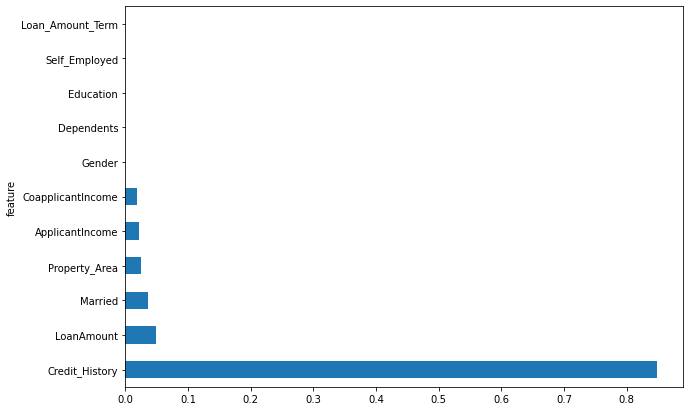

In [104]:
# for decision tree
feature(x_train,dt_grid).plot('feature','importance','barh',figsize=(10,7),legend = False)

<AxesSubplot:ylabel='feature'>

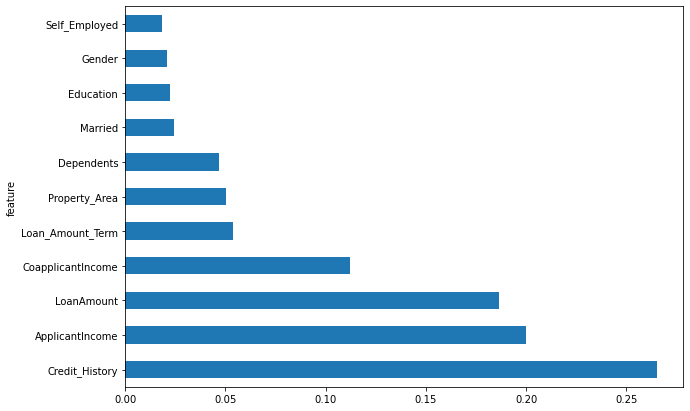

In [105]:
# for random forest
feature(x_train,rf_random).plot('feature','importance','barh',figsize=(10,7),legend = False)

<AxesSubplot:ylabel='feature'>

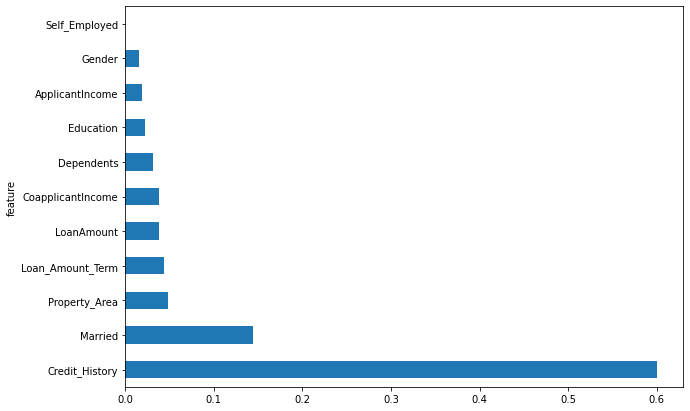

In [106]:
# for XGBoost
feature(x_train,xgb_random).plot('feature','importance','barh',figsize=(10,7),legend = False)